In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)

!pip install --upgrade threadpoolctl scikit-learn

from sklearn import linear_model

from sklearn import tree

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor

from geopy.geocoders import Nominatim

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans

!pip install statsmodels

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot


from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
travel = pd.read_excel("Travel details dataset.xlsx")

In [3]:
# get the dataset shape

travel_shape = travel.shape



# get the geometric size of dataset
geometric_size = np.prod(travel_shape)

print("Geometric size of dataset:", geometric_size)


Geometric size of dataset: 1807


In [4]:
print("travel content:")
travel


travel content:


Trip ID             Destination Start date   End date  Duration (days)  \
0          1              London, UK 2023-05-01 2023-05-08              7.0   
1          2        Phuket, Thailand 2023-06-15 2023-06-20              5.0   
2          3         Bali, Indonesia 2023-07-01 2023-07-08              7.0   
3          4           New York, USA 2023-08-15 2023-08-29             14.0   
4          5            Tokyo, Japan 2023-09-10 2023-09-17              7.0   
..       ...                     ...        ...        ...              ...   
134      135  Rio de Janeiro, Brazil 2023-08-01 2023-08-10              9.0   
135      136       Vancouver, Canada 2023-08-15 2023-08-21              6.0   
136      137       Bangkok, Thailand 2023-09-01 2023-09-08              7.0   
137      138        Barcelona, Spain 2023-09-15 2023-09-22              7.0   
138      139   Auckland, New Zealand 2023-10-01 2023-10-08              7.0   

       Traveler name  Traveler age Traveler gender Traveler nationality  \
0         John Smith          35.0            Male             American   
1           Jane Doe          28.0          Female             Canadian   
2          David Lee          45.0            Male               Korean   
3      Sarah Johnson          29.0          Female              British   
4         Kim Nguyen          26.0          Female           Vietnamese   
..               ...           ...             ...                  ...   
134       Jose Perez          37.0            Male            Brazilian   
135      Emma Wilson          29.0          Female             Canadian   
136        Ryan Chen          34.0            Male              Chinese   
137  Sofia Rodriguez          25.0          Female              Spanish   
138    William Brown          39.0            Male        New Zealander   

    Accommodation type Accommodation cost Transportation type  \
0                Hotel               1200              Flight   
1               Resort                800              Flight   
2                Villa               1000              Flight   
3                Hotel               2000              Flight   
4               Airbnb                700               Train   
..                 ...                ...                 ...   
134             Hostel               2500                 Car   
135              Hotel               5000            Airplane   
136             Hostel               2000               Train   
137             Airbnb               6000            Airplane   
138              Hotel               7000               Train   

    Transportation cost  
0                   600  
1                   500  
2                   700  
3                  1000  
4                   200  
..                  ...  
134                2000  
135                3000  
136                1000  
137                2500  
138                2500  

[139 rows x 13 columns]

In [5]:
#show the first few rows of the data set


print("travel content:")
travel.head()

travel content:


Trip ID       Destination Start date   End date  Duration (days)  \
0        1        London, UK 2023-05-01 2023-05-08              7.0   
1        2  Phuket, Thailand 2023-06-15 2023-06-20              5.0   
2        3   Bali, Indonesia 2023-07-01 2023-07-08              7.0   
3        4     New York, USA 2023-08-15 2023-08-29             14.0   
4        5      Tokyo, Japan 2023-09-10 2023-09-17              7.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0     John Smith          35.0            Male             American   
1       Jane Doe          28.0          Female             Canadian   
2      David Lee          45.0            Male               Korean   
3  Sarah Johnson          29.0          Female              British   
4     Kim Nguyen          26.0          Female           Vietnamese   

  Accommodation type Accommodation cost Transportation type  \
0              Hotel               1200              Flight   
1             Resort                800              Flight   
2              Villa               1000              Flight   
3              Hotel               2000              Flight   
4             Airbnb                700               Train   

  Transportation cost  
0                 600  
1                 500  
2                 700  
3                1000  
4                 200

In [6]:
#Check if values are missing in any rows and drop the rows


travel.dropna(inplace=True)
print(travel.shape)

(136, 13)


In [7]:
print(travel)

     Trip ID             Destination Start date   End date  Duration (days)  \
0          1              London, UK 2023-05-01 2023-05-08              7.0   
1          2        Phuket, Thailand 2023-06-15 2023-06-20              5.0   
2          3         Bali, Indonesia 2023-07-01 2023-07-08              7.0   
3          4           New York, USA 2023-08-15 2023-08-29             14.0   
4          5            Tokyo, Japan 2023-09-10 2023-09-17              7.0   
..       ...                     ...        ...        ...              ...   
134      135  Rio de Janeiro, Brazil 2023-08-01 2023-08-10              9.0   
135      136       Vancouver, Canada 2023-08-15 2023-08-21              6.0   
136      137       Bangkok, Thailand 2023-09-01 2023-09-08              7.0   
137      138        Barcelona, Spain 2023-09-15 2023-09-22              7.0   
138      139   Auckland, New Zealand 2023-10-01 2023-10-08              7.0   

       Traveler name  Traveler age Traveler gender 

In [8]:
#Find the maximum and average age of Male and Female as different groups



gender_Traveler_age = travel.groupby('Traveler gender')['Traveler age'].agg(['max', 'mean'])
print(gender_Traveler_age)

                  max       mean
Traveler gender                 
Female           42.0  30.328571
Male             60.0  36.075758


In [9]:
# Convert columns to numeric data type

travel["Accommodation cost"] = pd.to_numeric(travel["Accommodation cost"], errors='coerce')

# Convert columns to numeric data type

travel["Transportation cost"] = pd.to_numeric(travel["Transportation cost"], errors='coerce')



In [10]:
# Split city and country if they are combined
travel[['City', 'Country']] = travel['Destination'].str.split(', ', expand=True)

# Fill in missing country information
city_to_country = {
    "London": "UK",
    "Phuket": "Thailand",
    "Bali": "Indonesia",
    "New York": "USA",
    "Tokyo": "Japan",
    "Paris": "France",
    "Sydney": "Australia",
    "Rio de Janeiro": "Brazil",
    "Amsterdam": "Netherlands",
    "Dubai": "United Arab Emirates",
    "Cancun": "Mexico",
    "Barcelona": "Spain",
    "Honolulu": "USA",
    "Berlin": "Germany",
    "Marrakech": "Morocco",
    "Edinburgh": "Scotland",
    "Bangkok": "Thailand",
    "Vancouver": "Canada",
    "Rome": "Italy",
    "Cape Town": "South Africa",
    "Los Angeles": "USA",
    "Seoul": "South Korea",
    "Phnom Penh": "Cambodia",
    "Athens": "Greece",
    "Auckland": "New Zealand"
}


# Function to map city to country
def map_city_to_country(city):
    for key, value in city_to_country.items():
        if city.lower() in key.lower():
            return value
    return None  # Return None if city not found in the mapping

# Extract city from destination
travel['City'] = travel['Destination'].apply(lambda x: x.split(",")[0].strip())




# Map city to country
travel['Country'] = travel['City'].apply(map_city_to_country)



# Calculate unique destinations by country
unique_destinations_by_country = travel['Country'].nunique()

print("Number of unique destinations by country:", unique_destinations_by_country)



# Get unique cities from the DataFrame
unique_cities = travel['Destination'].unique()

# Check for missing mappings
missing_mappings = set(unique_cities) - set(city_to_country.keys())




# Number & Distribution of unique Destination in the data


Country = len(travel['Country'].unique())
print(Country)

print(travel['Country'].value_counts())


Number of unique destinations by country: 22
23
France                  14
Indonesia               12
Japan                   12
Australia               12
Thailand                11
USA                     10
Italy                    8
UK                       7
Spain                    6
Brazil                   5
Mexico                   4
South Africa             4
United Arab Emirates     3
Netherlands              3
Canada                   2
South Korea              2
Germany                  1
Morocco                  1
Scotland                 1
Cambodia                 1
Greece                   1
New Zealand              1
Name: Country, dtype: int64


In [11]:
print(travel)

     Trip ID             Destination Start date   End date  Duration (days)  \
0          1              London, UK 2023-05-01 2023-05-08              7.0   
1          2        Phuket, Thailand 2023-06-15 2023-06-20              5.0   
2          3         Bali, Indonesia 2023-07-01 2023-07-08              7.0   
3          4           New York, USA 2023-08-15 2023-08-29             14.0   
4          5            Tokyo, Japan 2023-09-10 2023-09-17              7.0   
..       ...                     ...        ...        ...              ...   
134      135  Rio de Janeiro, Brazil 2023-08-01 2023-08-10              9.0   
135      136       Vancouver, Canada 2023-08-15 2023-08-21              6.0   
136      137       Bangkok, Thailand 2023-09-01 2023-09-08              7.0   
137      138        Barcelona, Spain 2023-09-15 2023-09-22              7.0   
138      139   Auckland, New Zealand 2023-10-01 2023-10-08              7.0   

       Traveler name  Traveler age Traveler gender 

In [12]:
# Find the country visited by most people within the data

# Count the occurrences of each country
country_counts = travel['Country'].value_counts()

# Get the country visited most
most_visited_country = country_counts.idxmax()
count_most_visited_country = country_counts.max()

print("The country visited most is:", most_visited_country)
print("Number of visits to the most visited country:", count_most_visited_country)


The country visited most is: France
Number of visits to the most visited country: 14


In [13]:
travel.columns

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost', 'City', 'Country'],
      dtype='object')

In [14]:
# Replace 'plane', 'flight', and 'airplane' with a single value, e.g., 'airplane'
travel['Transportation type'] = travel['Transportation type'].replace(['Plane', 'Flight'], 'Airplane')


print(travel['Transportation type'].value_counts())


Airplane      75
Train         37
Car rental    13
Bus            6
Car            3
Subway         1
Ferry          1
Name: Transportation type, dtype: int64


In [15]:
print(travel)

     Trip ID             Destination Start date   End date  Duration (days)  \
0          1              London, UK 2023-05-01 2023-05-08              7.0   
1          2        Phuket, Thailand 2023-06-15 2023-06-20              5.0   
2          3         Bali, Indonesia 2023-07-01 2023-07-08              7.0   
3          4           New York, USA 2023-08-15 2023-08-29             14.0   
4          5            Tokyo, Japan 2023-09-10 2023-09-17              7.0   
..       ...                     ...        ...        ...              ...   
134      135  Rio de Janeiro, Brazil 2023-08-01 2023-08-10              9.0   
135      136       Vancouver, Canada 2023-08-15 2023-08-21              6.0   
136      137       Bangkok, Thailand 2023-09-01 2023-09-08              7.0   
137      138        Barcelona, Spain 2023-09-15 2023-09-22              7.0   
138      139   Auckland, New Zealand 2023-10-01 2023-10-08              7.0   

       Traveler name  Traveler age Traveler gender 

In [16]:
# check for data types

print(travel.dtypes)

Trip ID                          int64
Destination                     object
Start date              datetime64[ns]
End date                datetime64[ns]
Duration (days)                float64
Traveler name                   object
Traveler age                   float64
Traveler gender                 object
Traveler nationality            object
Accommodation type              object
Accommodation cost             float64
Transportation type             object
Transportation cost            float64
City                            object
Country                         object
dtype: object


In [17]:
# Store Duration (days) as a dependent variable (y) and Traveler age, Traveler gender, Accommodation type, Accommodation cost, Transportation type, Transportation cost as an independent variable (X)

y = travel[['Duration (days)']]

X = travel[['Traveler age','Traveler gender','Accommodation type', 'Accommodation cost', 'Transportation type', 'Transportation cost']]



# First, Convert labels to numbers

from sklearn.preprocessing import LabelEncoder

LabelEncoder()


LabelEncoder()

In [18]:
# preprocess using label encoder

le_Accommodation_type = LabelEncoder()
le_Transportation_type = LabelEncoder()
le_Traveler_gender = LabelEncoder()



In [19]:

X['Accommodation_type'] = le_Accommodation_type.fit_transform(X['Accommodation type'])
X['Transportation_type'] = le_Transportation_type.fit_transform(X['Transportation type'])
X['Traveler_gender'] = le_Traveler_gender.fit_transform(X['Traveler gender'])


X.head()

C:\Users\bisco\AppData\Local\Temp\ipykernel_3384\1329187274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Accommodation_type'] = le_Accommodation_type.fit_transform(X['Accommodation type'])
C:\Users\bisco\AppData\Local\Temp\ipykernel_3384\1329187274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Transportation_type'] = le_Transportation_type.fit_transform(X['Transportation type'])
C:\Users\bisco\AppData\Local\Temp\ipykernel_3384\1329187274.py:3: SettingWithCopyWarning: 
A value is trying to

Traveler age Traveler gender Accommodation type  Accommodation cost  \
0          35.0            Male              Hotel              1200.0   
1          28.0          Female             Resort               800.0   
2          45.0            Male              Villa              1000.0   
3          29.0          Female              Hotel              2000.0   
4          26.0          Female             Airbnb               700.0   

  Transportation type  Transportation cost  Accommodation_type  \
0            Airplane                600.0                   3   
1            Airplane                500.0                   4   
2            Airplane                700.0                   7   
3            Airplane               1000.0                   3   
4               Train                200.0                   0   

   Transportation_type  Traveler_gender  
0                    0                1  
1                    0                0  
2                    0                1  
3                    0                0  
4                    6                0

In [20]:
# drop old label columns

X_n = X.drop(['Accommodation type','Transportation type', 'Traveler gender'], axis='columns')
X_n


Traveler age  Accommodation cost  Transportation cost  \
0            35.0              1200.0                600.0   
1            28.0               800.0                500.0   
2            45.0              1000.0                700.0   
3            29.0              2000.0               1000.0   
4            26.0               700.0                200.0   
..            ...                 ...                  ...   
134          37.0              2500.0               2000.0   
135          29.0              5000.0               3000.0   
136          34.0              2000.0               1000.0   
137          25.0              6000.0               2500.0   
138          39.0              7000.0               2500.0   

     Accommodation_type  Transportation_type  Traveler_gender  
0                     3                    0                1  
1                     4                    0                0  
2                     7                    0                1  
3                     3                    0                0  
4                     0                    6                0  
..                  ...                  ...              ...  
134                   2                    2                1  
135                   3                    0                0  
136                   2                    6                1  
137                   0                    0                0  
138                   3                    6                1  

[136 rows x 6 columns]

In [21]:

y


Duration (days)
0                7.0
1                5.0
2                7.0
3               14.0
4                7.0
..               ...
134              9.0
135              6.0
136              7.0
137              7.0
138              7.0

[136 rows x 1 columns]

In [22]:
# Create a training (80%) and test set (20%) from the dataset using Decision Tree and Random Forest classifier. 

X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.2, random_state=42)

X_train,y_train

(     Traveler age  Accommodation cost  Transportation cost  \
 11           36.0               800.0                100.0   
 68           33.0               300.0                700.0   
 132          42.0              4000.0               1500.0   
 77           25.0                 NaN                  NaN   
 86           45.0                 NaN                  NaN   
 ..            ...                 ...                  ...   
 72           35.0                 NaN                  NaN   
 108          30.0              1500.0               1200.0   
 14           26.0               600.0                400.0   
 94           35.0               500.0                800.0   
 104          41.0               600.0                150.0   
 
      Accommodation_type  Transportation_type  Traveler_gender  
 11                    0                    6                1  
 68                    2                    0                0  
 132                   0                    6  

In [23]:
# Before we fit and classify, we have to Clean up data set to Input missing values in the data set

from sklearn.impute import SimpleImputer

# Create an instance of the imputer
imputer = SimpleImputer(strategy='median')

# Fit imputer to the training data for X only (Note that y has no missing values)
imputer.fit(X_train)

# Transform the training and testing data using the imputer
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)


In [24]:
# create a logistic regression object

model = LogisticRegression()

In [25]:
# fit the logistic regression model on the training set

model.fit(X_train, y_train)


C:\Users\bisco\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisco\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# evaluate the logistic regression model on the test set

y_pred_logReg = model.predict(X_test)

In [27]:
# find the accuracy score of the model

accuracy_logReg = accuracy_score(y_test,y_pred_logReg)
print(accuracy_logReg)

0.2857142857142857


In [28]:
# find the F1 score of the model

F1_logReg = f1_score(y_test, y_pred_logReg, average='weighted')
print(F1_logReg)


0.18030753968253968


In [29]:
# find the confusion matrix of the model

C_Matrix = confusion_matrix(y_test, y_pred_logReg)
print(C_Matrix)

[[0 0 2 0 0 0]
 [0 0 6 0 1 0]
 [0 0 7 2 0 0]
 [0 0 4 1 0 0]
 [0 0 3 0 0 0]
 [0 0 1 1 0 0]]


In [30]:
# #assume/create new data points

# travel_new = []

In [31]:
#USING DECISION TREES ALGORITHM

In [32]:
# Create a decision tree regression model
reg_decision_tree = DecisionTreeRegressor(random_state=42)

In [33]:
# Fit the model

reg_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
# Create Decision tree classifier

model_decision_tree = tree.DecisionTreeClassifier()

model_decision_tree.fit(X_train, y_train )

DecisionTreeClassifier()

Defaulting to user installation because normal site-packages is not writeable


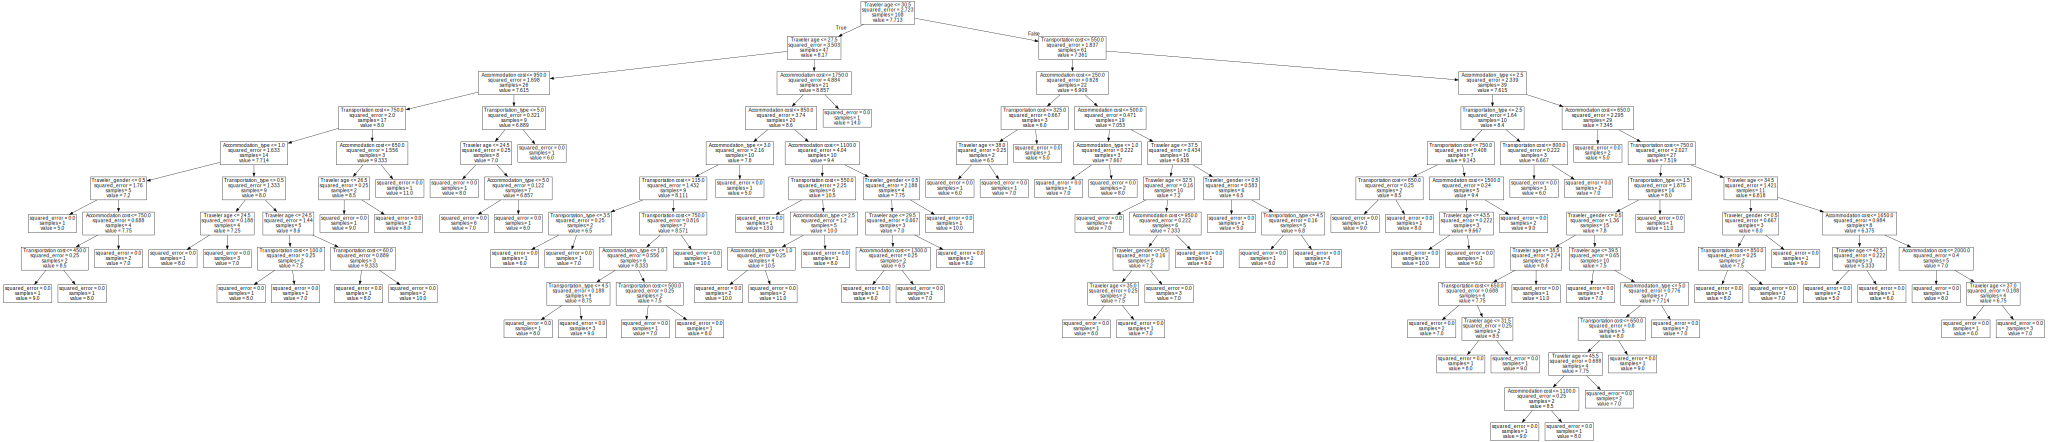

In [35]:
# Generate tree for the Decision tree

# Display it in Jupyter option


!pip install graphviz

from IPython.display import SVG

import graphviz

graph = tree.export_graphviz(reg_decision_tree, out_file=None, feature_names=X_n.columns)

graph = graphviz.Source(graph)
graph.render("decision_tree")
SVG(graph.pipe(format='svg'))



In [36]:
# find the accuracy of Decision Tree classifier for the test set

y_pred_decisionTree = model_decision_tree.predict(X_test)
print(y_pred_decisionTree)


[11.  8.  8.  8.  6.  7.  7.  7.  5.  7. 11.  9.  7.  7.  6. 10.  6.  8.
  9.  7. 11. 10.  5.  7.  8.  5.  5.  7.]


In [37]:
Accuracy_decisionTree = accuracy_score(y_test, y_pred_decisionTree)
print(Accuracy_decisionTree)

0.10714285714285714


In [38]:
# find the F1 score of the model

F1_decisionTree = f1_score(y_test, y_pred_decisionTree, average='weighted')
print(F1_decisionTree)


0.13571428571428573


In [39]:
# find the confusion matrix of Decision Tree classifier for the test set

C_Matrix = confusion_matrix(y_test, y_pred_decisionTree)
print(C_Matrix)

[[0 0 1 1 0 0 0]
 [1 2 2 2 0 0 0]
 [1 0 1 2 2 1 2]
 [1 0 3 0 0 1 0]
 [0 1 2 0 0 0 0]
 [1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]]


In [40]:
#USING RANDOM FORESTS ALGORITHM

In [41]:
# Create Random forest classifier

from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier()

model_random_forest.fit(X_train, y_train)

C:\Users\bisco\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [42]:
# find the accuracy of Random Forest classifier for the test set

y_pred_randomForest = model_random_forest.predict(X_test)
print(y_pred_randomForest)


[11.  8.  8.  8.  7.  7.  8.  7.  5.  7. 10.  7.  7.  7.  6. 10.  7.  7.
  9.  7. 10. 10.  5.  7.  7.  7.  7.  7.]


In [43]:
Accuracy_randomForest = accuracy_score(y_test, y_pred_randomForest)
print(Accuracy_randomForest)

0.17857142857142858


In [44]:
F1_randomForest = f1_score(y_test, y_pred_randomForest, average='weighted')
print(F1_randomForest)

0.14384920634920634


In [45]:
# find the confusion matrix of Random forest classifier for the test set

C_Matrix = confusion_matrix(y_test, y_pred_randomForest)
print(C_Matrix)

[[0 0 2 0 0 0 0]
 [0 0 6 1 0 0 0]
 [0 0 3 2 1 2 1]
 [1 0 2 1 0 1 0]
 [0 1 2 0 0 0 0]
 [1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]]


In [46]:
# Perform K-means clustering

# using k = 5

kmc = KMeans(n_clusters=5)
kmc

KMeans(n_clusters=5)

In [47]:
# fit to the data frame


#first, we'll handle NaN values

X_n.dropna(inplace=True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  
X_n = imputer.fit_transform(X_n)



kmc.fit(X_n)



C:\Users\bisco\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [48]:
# Show/Print the cluster membership of the first 100 samples and feature of the centroids (cluster center). 

kmc_membership = kmc.predict(X_n[:100])

print(kmc_membership)

print(kmc.cluster_centers_)

[3 0 4 3 0 3 4 4 0 3 0 0 2 3 0 0 0 3 0 3 0 4 0 4 0 3 0 0 0 0 0 0 4 0 4 0 0
 0 3 0 4 3 3 0 4 3 0 0 4 0 0 0 3 0 0 0 0 0 0 0 3 0 0 3 4 3 0 4 4 0 3 4 0 4
 4 0 4 0 4 0 3 0 4 0 0 3 4 0 3 0 0 3 4 4 0 4 0 4 3 4]
[[3.24038462e+01 7.90000000e+02 2.20096154e+02 1.96153846e+00
  4.21153846e+00 4.42307692e-01]
 [3.05714286e+01 6.28571429e+03 2.50000000e+03 2.14285714e+00
  1.71428571e+00 2.85714286e-01]
 [3.82500000e+01 3.12500000e+03 1.67500000e+03 2.00000000e+00
  2.50000000e+00 7.50000000e-01]
 [3.51250000e+01 1.60000000e+03 7.95833333e+02 3.58333333e+00
  3.75000000e-01 6.25000000e-01]
 [3.19285714e+01 6.50000000e+02 8.07142857e+02 2.25000000e+00
  8.88178420e-16 4.64285714e-01]]


C:\Users\bisco\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bisco\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bisco\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bisco\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

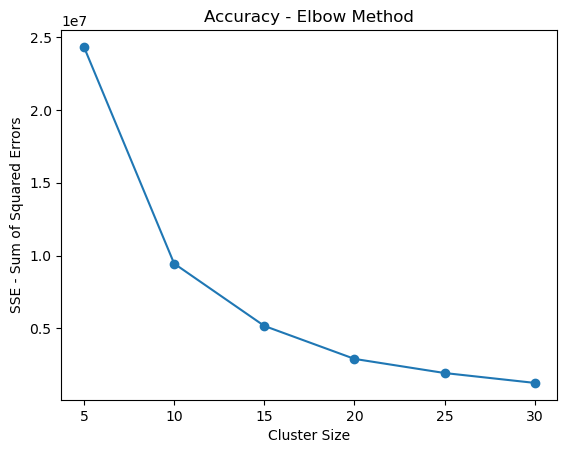

In [49]:
# Use Elbow method to calculate Accuracy

wcss = []
for k in [5, 10, 15, 20, 25, 30]:
    kmc = KMeans(n_clusters=k)
    kmc.fit(X_n)
    wcss.append(kmc.inertia_)

plt.plot([5, 10, 15, 20, 25, 30], wcss, marker='o')
plt.title('Accuracy - Elbow Method')
plt.xlabel('Cluster Size')
plt.ylabel('SSE - Sum of Squared Errors')
plt.show()


In [50]:
# # Evaluate forecast accuracy
# mse = mean_squared_error(test_data, forecast)
# print('Mean Squared Error:', mse)

In [51]:
#plot showing the trend in travel demand over time

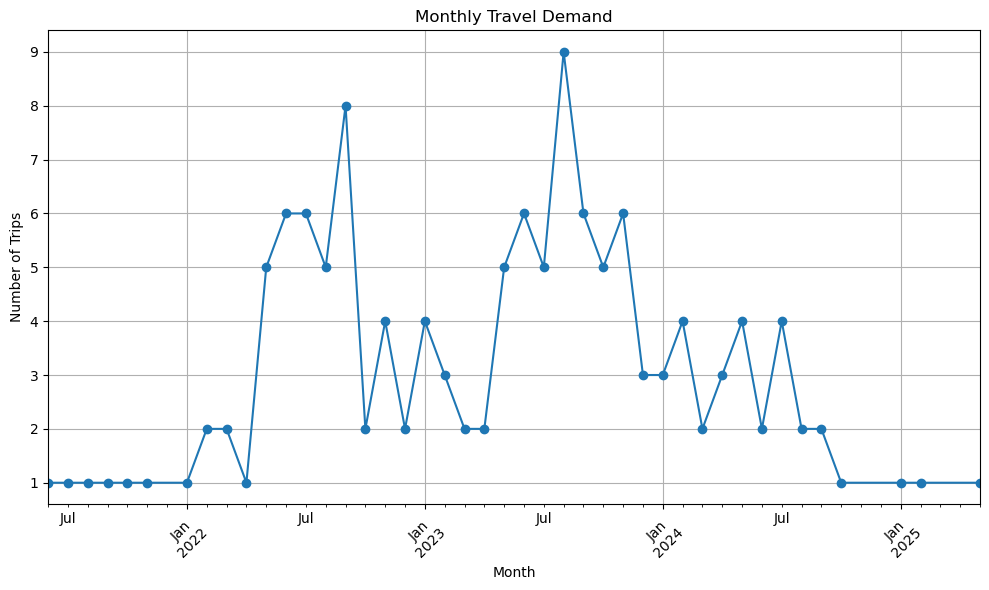

In [52]:

# Convert 'Start date' and 'End date' columns to datetime
travel['Start date'] = pd.to_datetime(travel['Start date'])
travel['End date'] = pd.to_datetime(travel['End date'])

# Extract month and year from 'Start date'
travel['Start month'] = travel['Start date'].dt.to_period('M')

# Group by month and count the number of trips
monthly_trips = travel.groupby('Start month').size()

# Plot the time series of travel demand
plt.figure(figsize=(10, 6))
monthly_trips.plot(marker='o', linestyle='-')
plt.title('Monthly Travel Demand')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
#Using Visualizations and Pivot Tables Analyze the relationship between traveler characteristics (age, gender, nationality) and their choice of accommodation and transportation.

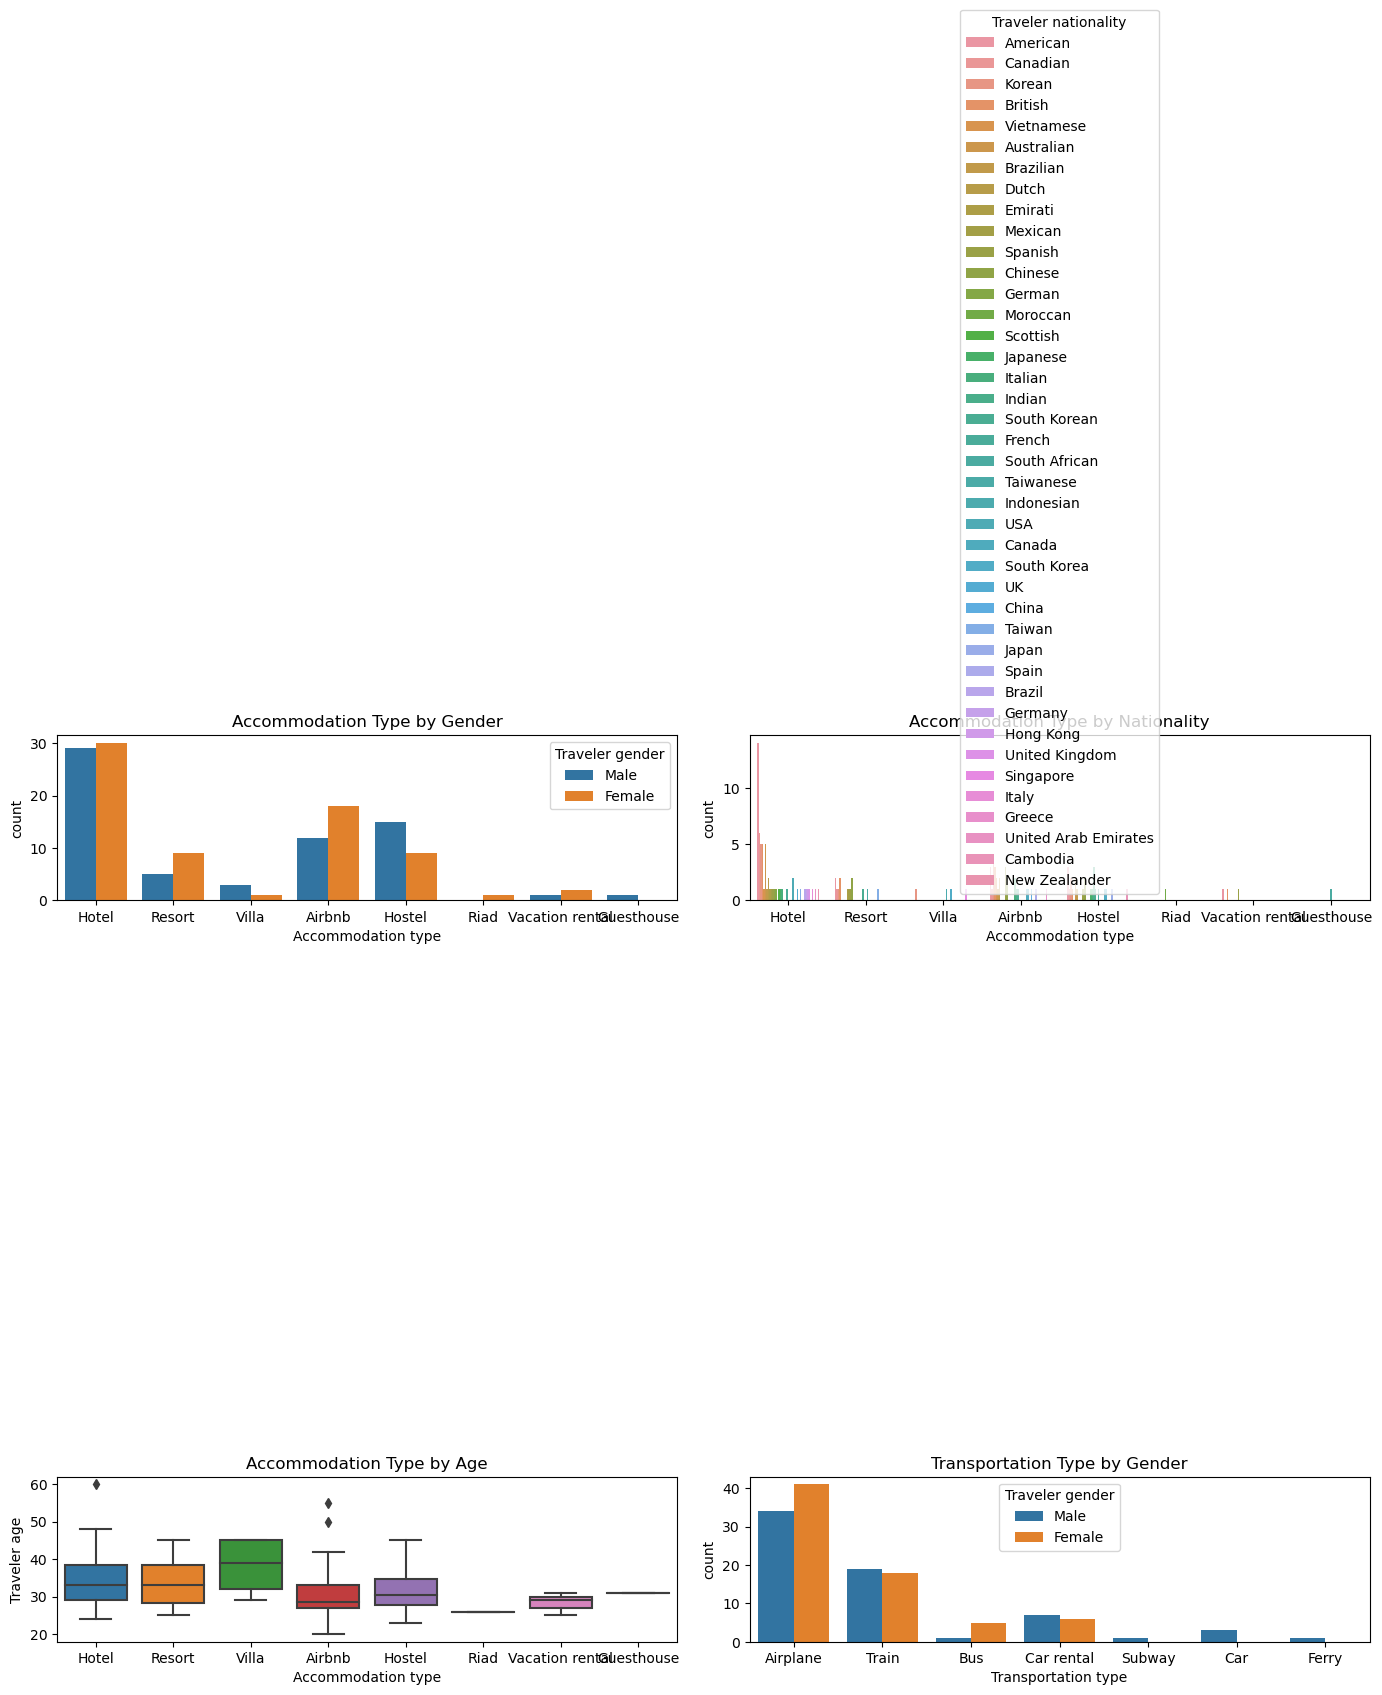


Gender Distribution by Accommodation Type:
 Traveler gender     Female  Male
Accommodation type              
Airbnb                18.0  12.0
Guesthouse             NaN   1.0
Hostel                 9.0  15.0
Hotel                 30.0  29.0
Resort                 9.0   5.0
Riad                   1.0   NaN
Vacation rental        2.0   1.0
Villa                  1.0   3.0

Nationality Distribution by Accommodation Type:
 Traveler nationality  American  Australian  Brazil  Brazilian  British  \
Accommodation type                                                       
Airbnb                     3.0         1.0     NaN        2.0      3.0   
Guesthouse                 NaN         NaN     NaN        NaN      NaN   
Hostel                     3.0         2.0     NaN        1.0      1.0   
Hotel                     14.0         5.0     1.0        1.0      5.0   
Resort                     2.0         NaN     NaN        NaN      2.0   
Riad                       NaN         NaN     NaN       

In [54]:
# Drop rows with missing values in relevant columns
travel = travel.dropna(subset=['Traveler age', 'Traveler gender', 'Traveler nationality',
                                'Accommodation type', 'Transportation type'])

# Bar plots for accommodation type by gender, nationality, and age groups
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Accommodation type', hue='Traveler gender', data=travel)
plt.title('Accommodation Type by Gender')

plt.subplot(2, 2, 2)
sns.countplot(x='Accommodation type', hue='Traveler nationality', data=travel)
plt.title('Accommodation Type by Nationality')

plt.subplot(2, 2, 3)
sns.boxplot(x='Accommodation type', y='Traveler age', data=travel)
plt.title('Accommodation Type by Age')

# Bar plots for transportation type by gender, nationality, and age groups
plt.subplot(2, 2, 4)
sns.countplot(x='Transportation type', hue='Traveler gender', data=travel)
plt.title('Transportation Type by Gender')

plt.tight_layout()
plt.show()

# Pivot tables for further analysis
pivot_gender = pd.pivot_table(travel, index='Accommodation type', columns='Traveler gender', aggfunc='size')
print("\nGender Distribution by Accommodation Type:\n", pivot_gender)

pivot_nationality = pd.pivot_table(travel, index='Accommodation type', columns='Traveler nationality', aggfunc='size')
print("\nNationality Distribution by Accommodation Type:\n", pivot_nationality)

pivot_age = pd.pivot_table(travel, index='Accommodation type', values='Traveler age', aggfunc='mean')
print("\nAverage Age by Accommodation Type:\n", pivot_age)

In [55]:
# Explore the impact of accommodation type and transportation mode on trip duration and cost using Scatter plots and Box plots

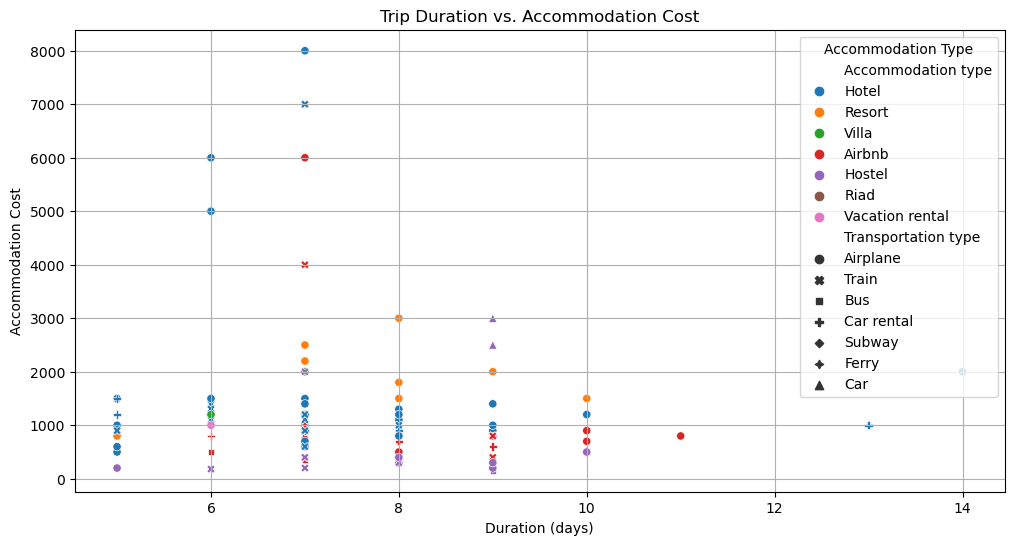

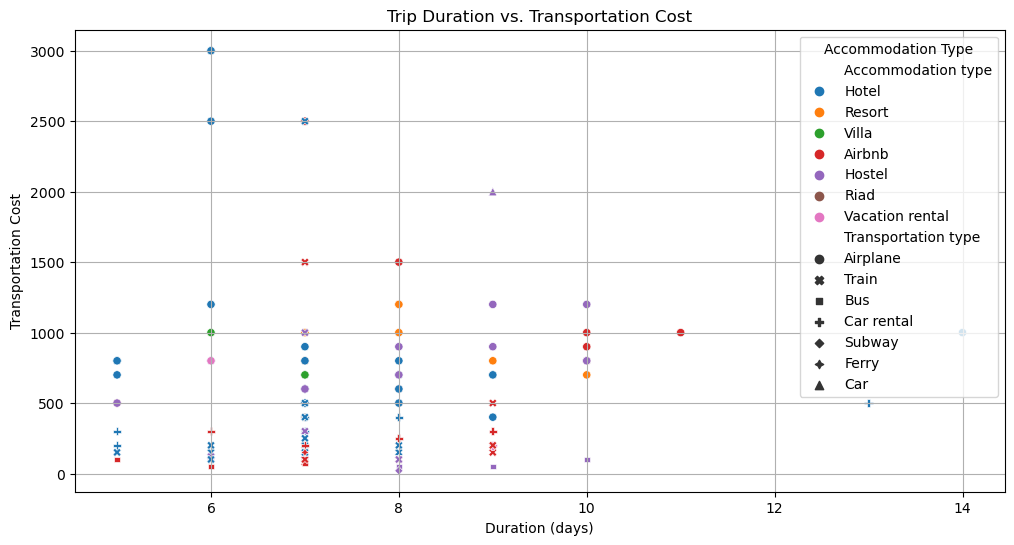

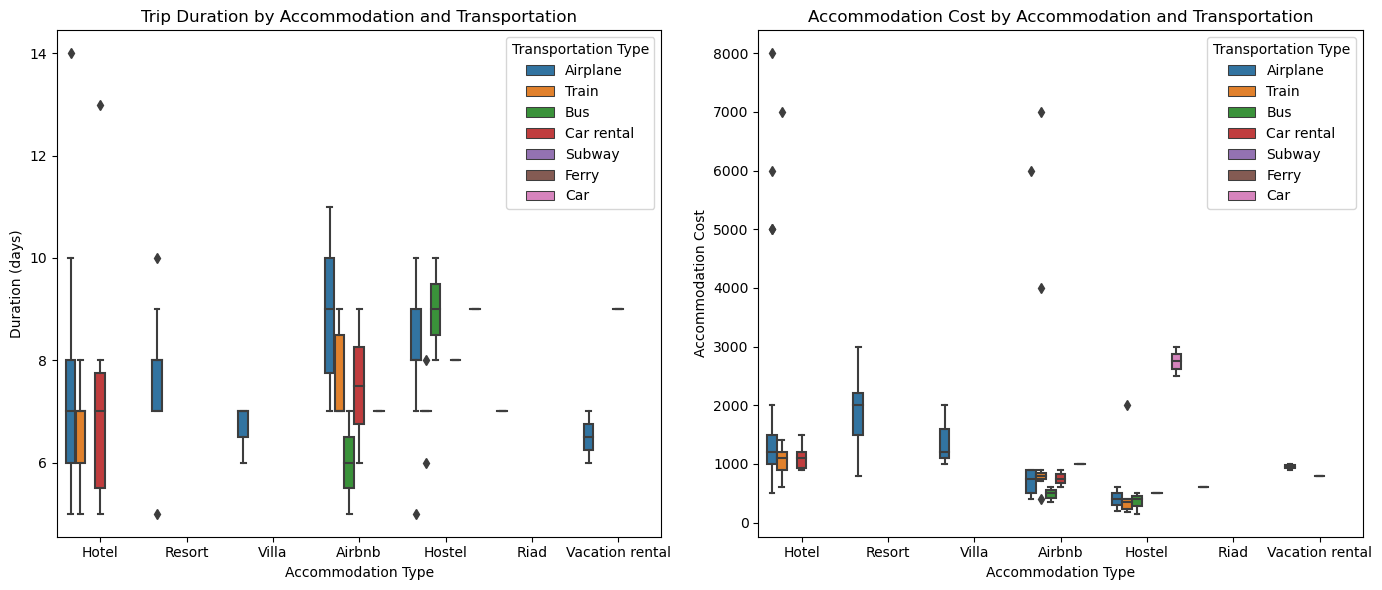


Summary Statistics for Trip Duration:
                                         count      mean       std  min   25%  \
Accommodation type Transportation type                                         
Airbnb             Airplane               8.0  8.875000  1.552648  7.0  7.75   
                   Bus                    3.0  6.000000  1.000000  5.0  5.50   
                   Car rental             4.0  7.500000  1.290994  6.0  6.75   
                   Ferry                  1.0  7.000000       NaN  7.0  7.00   
                   Train                 11.0  7.636364  0.924416  7.0  7.00   
Hostel             Airplane              10.0  8.200000  1.475730  5.0  8.00   
                   Bus                    3.0  9.000000  1.000000  8.0  8.50   
                   Car                    2.0  9.000000  0.000000  9.0  9.00   
                   Subway                 1.0  8.000000       NaN  8.0  8.00   
                   Train                  6.0  7.000000  0.632456  6.0  7.00   


In [56]:
# Drop rows with missing values in relevant columns
travel = travel.dropna(subset=['Duration (days)', 'Accommodation cost', 'Transportation cost',
                               'Accommodation type', 'Transportation type'])

# Scatter plot for trip duration vs. cost, colored by accommodation type and transportation mode
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Duration (days)', y='Accommodation cost', hue='Accommodation type', style='Transportation type', data=travel)
plt.title('Trip Duration vs. Accommodation Cost')
plt.xlabel('Duration (days)')
plt.ylabel('Accommodation Cost')
plt.legend(title='Accommodation Type')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Duration (days)', y='Transportation cost', hue='Accommodation type', style='Transportation type', data=travel)
plt.title('Trip Duration vs. Transportation Cost')
plt.xlabel('Duration (days)')
plt.ylabel('Transportation Cost')
plt.legend(title='Accommodation Type')
plt.grid(True)
plt.show()

# Box plots for trip duration and cost by accommodation type and transportation mode
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Accommodation type', y='Duration (days)', hue='Transportation type', data=travel)
plt.title('Trip Duration by Accommodation and Transportation')
plt.xlabel('Accommodation Type')
plt.ylabel('Duration (days)')
plt.legend(title='Transportation Type')

plt.subplot(1, 2, 2)
sns.boxplot(x='Accommodation type', y='Accommodation cost', hue='Transportation type', data=travel)
plt.title('Accommodation Cost by Accommodation and Transportation')
plt.xlabel('Accommodation Type')
plt.ylabel('Accommodation Cost')
plt.legend(title='Transportation Type')

plt.tight_layout()
plt.show()

# Descriptive statistics
summary_duration = travel.groupby(['Accommodation type', 'Transportation type'])['Duration (days)'].describe()
print("\nSummary Statistics for Trip Duration:\n", summary_duration)

summary_accommodation_cost = travel.groupby(['Accommodation type', 'Transportation type'])['Accommodation cost'].describe()
print("\nSummary Statistics for Accommodation Cost:\n", summary_accommodation_cost)

summary_transportation_cost = travel.groupby(['Accommodation type', 'Transportation type'])['Transportation cost'].describe()
print("\nSummary Statistics for Transportation Cost:\n", summary_transportation_cost)

In [57]:
# histogram, bar chart, and pie chart showing the relationship between traveler characteristics (age, gender, nationality) and their choice of accommodation and transportation

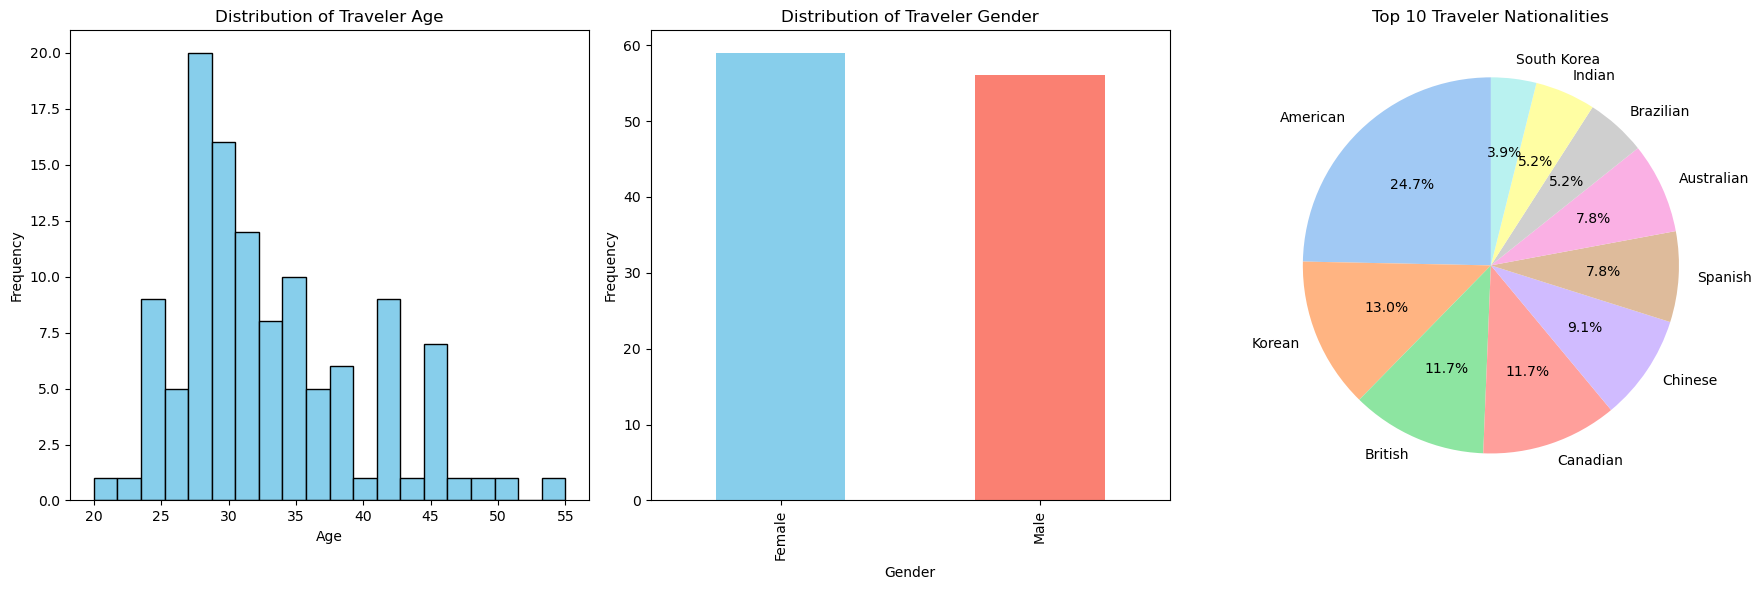


Preferred Accommodation Types based on Traveler Characteristics:
 Accommodation type                                 Airbnb  Hostel  Hotel  \
Traveler age Traveler gender Traveler nationality                          
20.0         Male            American                 1.0     0.0    0.0   
23.0         Female          Indian                   0.0     1.0    0.0   
24.0         Female          Vietnamese               0.0     0.0    1.0   
             Male            Korean                   0.0     1.0    1.0   
25.0         Female          American                 0.0     0.0    1.0   
...                                                   ...     ...    ...   
45.0         Male            South Korea              0.0     1.0    0.0   
47.0         Male            Canadian                 0.0     0.0    1.0   
48.0         Male            German                   0.0     0.0    1.0   
50.0         Male            China                    1.0     0.0    0.0   
55.0         Male    

In [58]:
# Drop rows with missing values in relevant columns
travel = travel.dropna(subset=['Traveler age', 'Traveler gender', 'Traveler nationality',
                               'Accommodation type', 'Transportation type'])

# Visualize the distribution of traveler characteristics
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
travel['Traveler age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Traveler Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
travel['Traveler gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Traveler Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
travel['Traveler nationality'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title('Top 10 Traveler Nationalities')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Analyze preferred accommodation types based on traveler characteristics
accommodation_preference = travel.groupby(['Traveler age', 'Traveler gender', 'Traveler nationality'])['Accommodation type'].value_counts().unstack().fillna(0)
print("\nPreferred Accommodation Types based on Traveler Characteristics:\n", accommodation_preference)

# Investigate transportation preferences
transportation_preference = travel.groupby(['Traveler age', 'Traveler gender', 'Traveler nationality'])['Transportation type'].value_counts().unstack().fillna(0)
print("\nTransportation Preferences based on Traveler Characteristics:\n", transportation_preference)

In [59]:
# APPLY ARIMA (AutoRegressive Integrated Moving Average) TO FORECAST TRAVEL-RELATED TIME SERIES DATA


# Convert 'Start date' to datetime
travel["Start date"] = pd.to_datetime(travel["Start date"])

# Create 'Year-Month' to group by month
travel["Year-Month"] = travel["Start date"].dt.to_period("M")

C:\Users\bisco\AppData\Local\Temp\ipykernel_3384\2217198260.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_costs = travel.groupby("Year-Month")["Accommodation cost", "Transportation cost"].sum()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


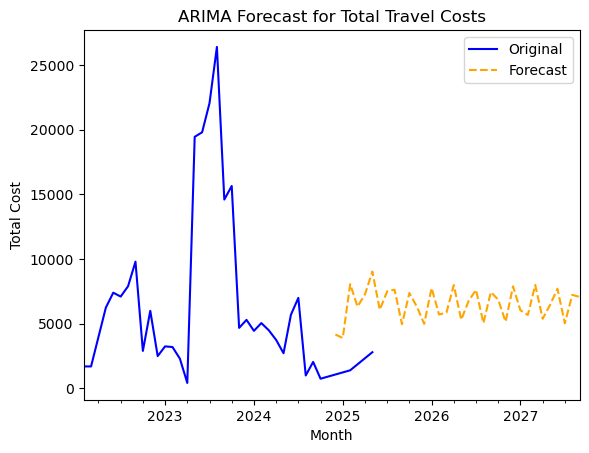

In [60]:
# Group by 'Year-Month' and calculate total costs
monthly_costs = travel.groupby("Year-Month")["Accommodation cost", "Transportation cost"].sum()
monthly_costs["Total Cost"] = monthly_costs["Accommodation cost"] + monthly_costs["Transportation cost"]

# Determine the time periods covered by monthly_costs["Total Cost"]
time_periods = monthly_costs.index

# Fit an ARIMA model to forecast future costs
arima_order = (5, 1, 5)  # Sample order
arima_model = ARIMA(monthly_costs["Total Cost"], order=arima_order)
arima_results = arima_model.fit()

# Forecast the next 3 time periods
forecast = arima_results.forecast(steps=len(time_periods))

# Plot the forecasted values along with the original data
monthly_costs["Total Cost"].plot(label="Original", linestyle='-', color='blue')
forecast.plot(label="Forecast", linestyle="--", color="orange")
plt.title("ARIMA Forecast for Total Travel Costs")
plt.xlabel("Month")
plt.ylabel("Total Cost")
plt.legend()
plt.show()

In [61]:
y_true_arima = monthly_costs["Total Cost"]
y_pred_arima = forecast

In [62]:
# Calculate MAE
mae = mean_absolute_error(y_true_arima, y_pred_arima)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_true_arima, y_pred_arima)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4716.734409780919
Mean Squared Error (MSE): 43430587.40198297
Root Mean Squared Error (RMSE): 6590.188722789581


Epoch 1/10
2/2 [==============================] - 3s 569ms/step - loss: 0.1821 - val_loss: 0.0156
Epoch 2/10
2/2 [==============================] - 0s 38ms/step - loss: 0.1740 - val_loss: 0.0130
Epoch 3/10
2/2 [==============================] - 0s 37ms/step - loss: 0.1563 - val_loss: 0.0110
Epoch 4/10
2/2 [==============================] - 0s 40ms/step - loss: 0.1335 - val_loss: 0.0095
Epoch 5/10
2/2 [==============================] - 0s 32ms/step - loss: 0.1323 - val_loss: 0.0084
Epoch 6/10
2/2 [==============================] - 0s 32ms/step - loss: 0.1204 - val_loss: 0.0078
Epoch 7/10
2/2 [==============================] - 0s 38ms/step - loss: 0.1114 - val_loss: 0.0076
Epoch 8/10
2/2 [==============================] - 0s 47ms/step - loss: 0.1006 - val_loss: 0.0079
Epoch 9/10
2/2 [==============================] - 0s 38ms/step - loss: 0.0956 - val_loss: 0.0086
Epoch 10/10
1/1 [==============================] - 0s 430ms/step


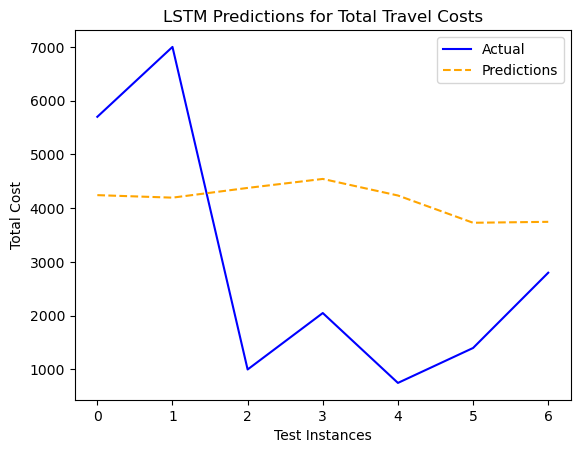

In [63]:
# APPLY LSTM (Long Short-Term Memory) TO FORECAST TRAVEL-RELATED TIME SERIES DATA


# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(monthly_costs["Total Cost"].values.reshape(-1, 1))

# Define the sequence length
sequence_length = 3  # Adjust as needed
X, y = [], []

# Prepare the dataset for LSTM by creating sequences
for i in range(len(normalized_data) - sequence_length):
    X.append(normalized_data[i:i + sequence_length])
    y.append(normalized_data[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = keras.Sequential([
    layers.LSTM(50, input_shape=(sequence_length, 1)),  # LSTM layer with 50 units
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.Dense(1)  # Output layer for regression
])

# Compile and train the model
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Make predictions with the trained model
predictions = model.predict(X_test)

# Plot the original data with the predicted values
plt.plot(range(len(y_test)), scaler.inverse_transform(y_test.reshape(-1, 1)), label="Actual", linestyle='-', color='blue')
plt.plot(range(len(predictions)), scaler.inverse_transform(predictions), label="Predictions", linestyle="--", color="orange")
plt.title("LSTM Predictions for Total Travel Costs")
plt.xlabel("Test Instances")
plt.ylabel("Total Cost")
plt.legend()
plt.show()

In [64]:
y_true_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))  # Convert normalized values back to original scale
y_pred_lstm = scaler.inverse_transform(predictions)  # Convert normalized values back to original scale

In [65]:
# Calculate MAE
mae = mean_absolute_error(y_true_lstm, y_pred_lstm)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_true_lstm, y_pred_lstm)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 2413.457763671875
Mean Squared Error (MSE): 6583617.105024482
Root Mean Squared Error (RMSE): 2565.856017983956
